In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'miami-housing.csv'
data = pd.read_csv(file_path)

In [3]:
info = data.info()
desc = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [4]:
bins = [0, 250000, 500000, data['SALE_PRC'].max()]
labels = ['Rendah', 'Menengah', 'Tinggi']
data['PRICE_CATEGORY'] = pd.cut(data['SALE_PRC'], bins=bins, labels=labels)

In [5]:
scaler = StandardScaler()
numeric_cols = ['SALE_PRC', 'LND_SQFOOT', 'TOT_LVG_AREA', 'RAIL_DIST', 
                'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'HWY_DIST', 'age']

data_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)
for col in numeric_cols:
    data[f'{col}_scaled'] = data_scaled[col]

In [6]:
correlation = data[numeric_cols].corr()

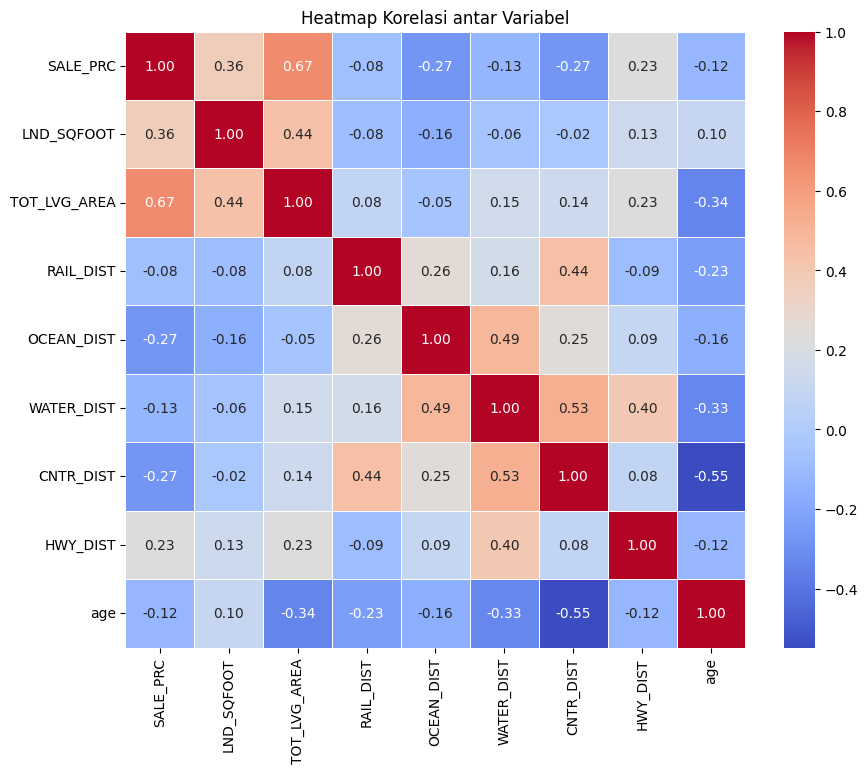

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar Variabel")
plt.show()

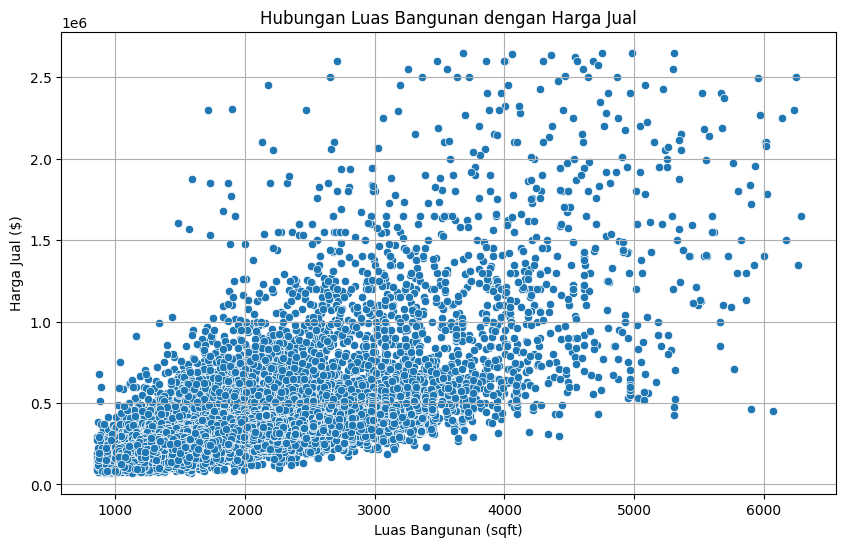

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOT_LVG_AREA', y='SALE_PRC', data=data)
plt.title('Hubungan Luas Bangunan dengan Harga Jual')
plt.xlabel('Luas Bangunan (sqft)')
plt.ylabel('Harga Jual ($)')
plt.grid(True)
plt.show()